In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('BSE_Google.jpg',cv2.IMREAD_GRAYSCALE)

In [3]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

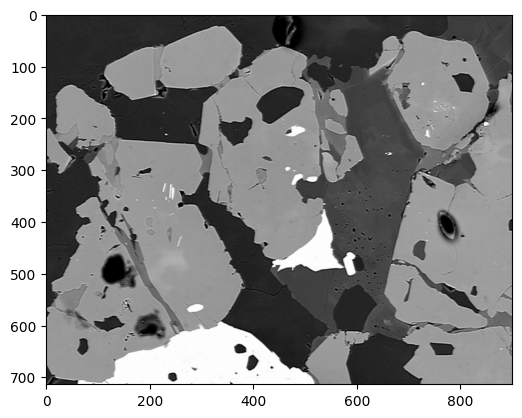

In [4]:
plt.imshow(img,cmap='gray')

In [5]:
img.shape

(714, 901)

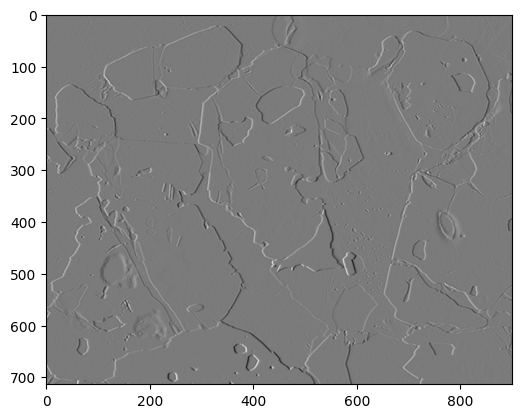

In [7]:
x = cv2.Sobel(img,cv2.CV_64F,dx=1,dy=0)
plt.imshow(x,cmap='gray')

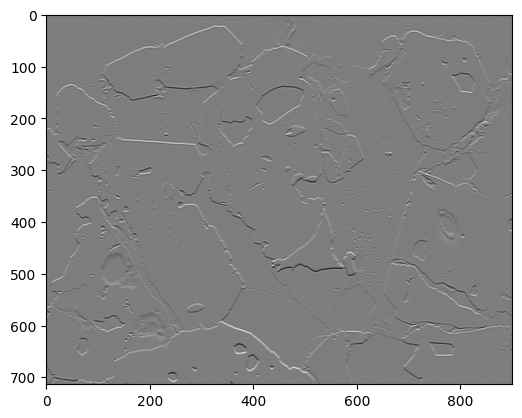

In [9]:
y = cv2.Sobel(img,cv2.CV_64F,dx=0,dy=1)
plt.imshow(y,cmap='gray')

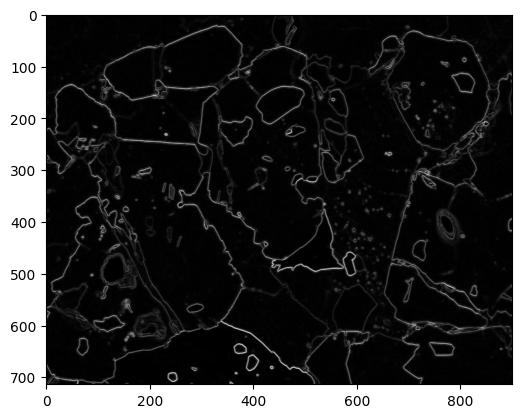

In [11]:
final = np.sqrt(x*x+y*y)
plt.imshow(final,cmap='gray')

In [42]:
def conv_2d(img,kernel,stride=1):
    img_h,img_w = len(img),len(img[0])
    k_h,k_w = len(kernel),len(kernel[0])
    output_h,output_w = (img_h-k_h)//stride+1,(img_w-k_w)//stride+1
    output = np.zeros((output_h,output_w))
    for i in range(0,img_h-k_h+1,stride):
        for j in range(0,img_w-k_w+1,stride):
            sub_matrix = img[i:i+k_h,j:j+k_w]
            output[i//stride,j//stride] = np.sum(sub_matrix*kernel)
    return output

In [45]:
def sobel_filter(img,dx=1,stride=1):
    x = np.array(((-1,0,1),(-2,0,2),(-1,0,1)))
    y = np.array(((-1,-2,-1),(0,0,0),(1,2,1)))
    dx = conv_2d(img,x)                
    dy = conv_2d(img,y)
    g = np.sqrt(dx**2+dy**2)
    g = np.clip(g,0,255)
    return g

In [47]:
out = sobel_filter(img)

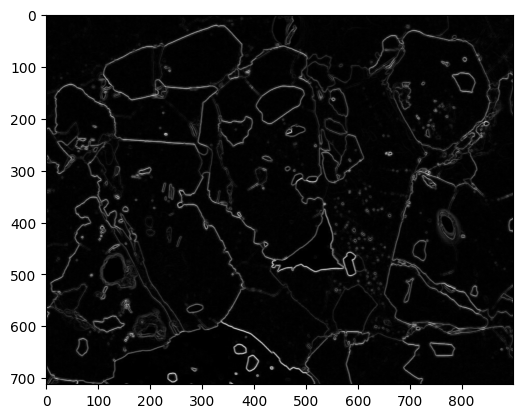

In [48]:
plt.imshow(out,cmap='gray')

In [15]:
np.array(((1,2,1),(0,0,0),(-1,-2,-1)))

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])